In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading datasets
customers_path = "Customers.csv"
products_path = "Products.csv"
transactions_path = "Transactions.csv"

# Reading files
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)

# Display the first few rows of each dataset
customers_head = customers.head()
products_head = products.head()
transactions_head = transactions.head()

In [3]:
customers_info = customers.info()
products_info = products.info()
transactions_info = transactions.info()
(customers_head, products_head, transactions_head, customers_info, products_info, transactions_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

In [4]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [38]:
# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

In [48]:
print(merged_data.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y', 'PriceRange'],
      dtype='object')


In [49]:
print(merged_data)

    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0          T00001      C0199      P067 2024-08-25 12:38:23         1   
1          T00112      C0146      P067 2024-05-27 22:23:54         1   
2          T00166      C0127      P067 2024-04-25 07:38:55         1   
3          T00272      C0087      P067 2024-03-26 22:55:37         2   
4          T00363      C0070      P067 2024-03-21 15:10:10         3   
..            ...        ...       ...                 ...       ...   
995        T00496      C0118      P037 2024-10-24 08:30:27         1   
996        T00759      C0059      P037 2024-06-04 02:15:24         3   
997        T00922      C0018      P037 2024-04-05 13:05:32         4   
998        T00959      C0115      P037 2024-09-29 10:16:02         2   
999        T00992      C0024      P037 2024-04-21 10:52:24         1   

     TotalValue  Price_x          CustomerName         Region SignupDate  \
0        300.68   300.68        Andrea Jenkins         Euro

In [6]:
# Basic statistics
print("\n--- Customers Summary ---")
print(customers.describe(include='all'))

print("\n--- Products Summary ---")
print(products.describe(include='all'))

print("\n--- Transactions Summary ---")
print(transactions.describe(include='all'))


--- Customers Summary ---
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00

--- Products Summary ---
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                 

C:\Users\skshu\AppData\Local\Temp\ipykernel_21140\2269929655.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=signup_trend.index, y=signup_trend.values, palette='viridis')


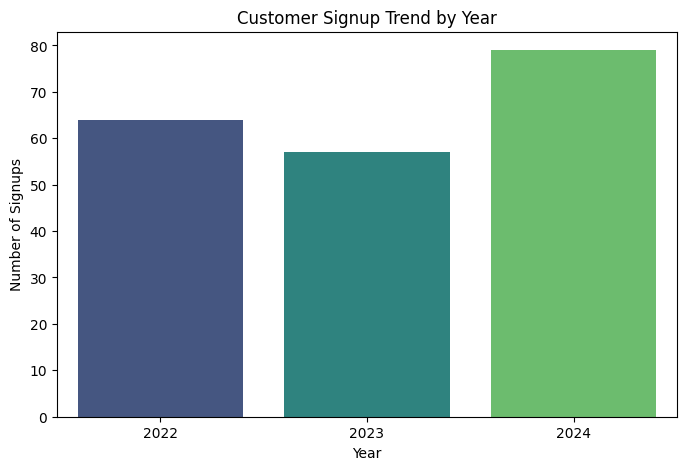

In [7]:
# 1 Customer signup analysis
signup_trend = customers['SignupDate'].dt.year.value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=signup_trend.index, y=signup_trend.values, palette='viridis')
plt.title('Customer Signup Trend by Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

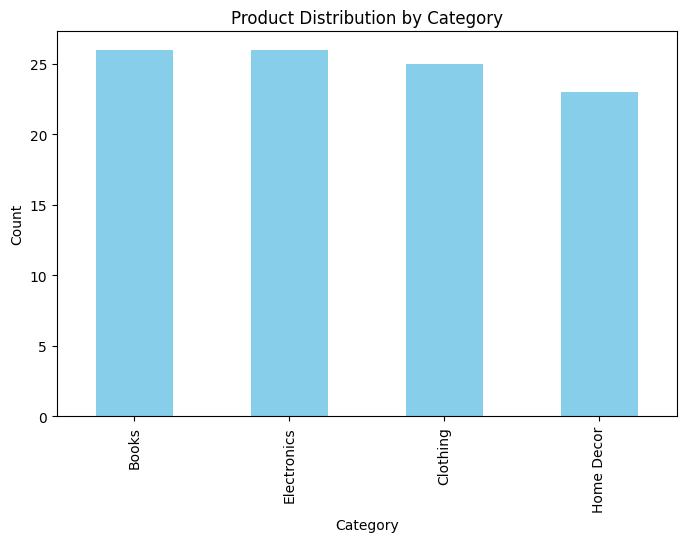

In [8]:
# 2 Product category distribution
category_distribution = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
category_distribution.plot(kind='bar', color='skyblue')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

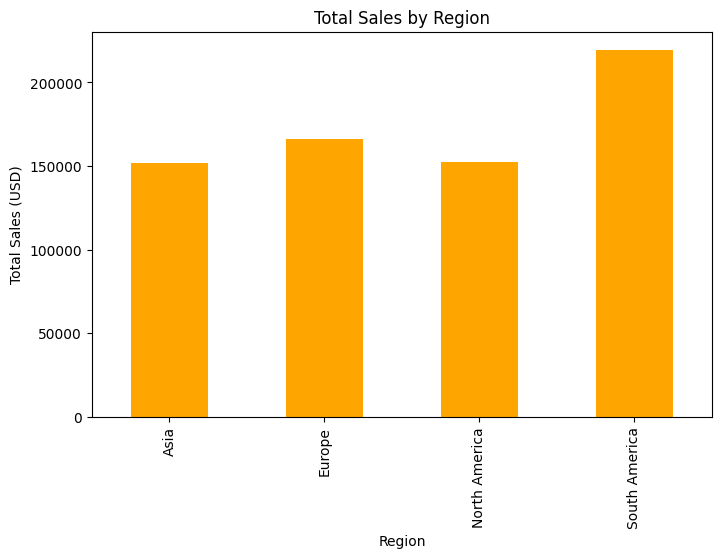

In [9]:
# 3 Region-based sales analysis
region_sales = merged_data.groupby('Region')['TotalValue'].sum()
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()

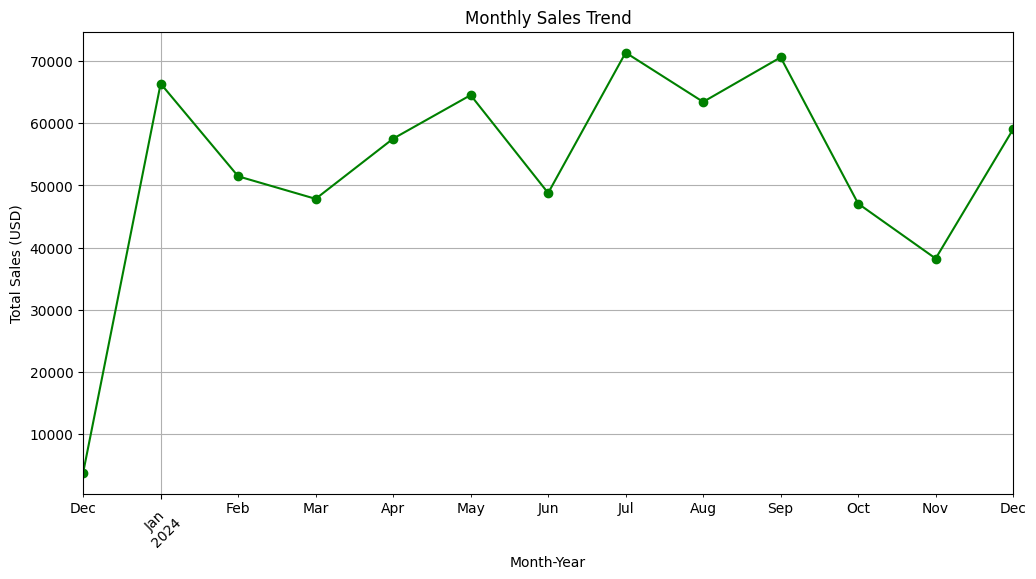

In [10]:
# 4 Monthly sales trends
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('MonthYear')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Top 5 Customers by Total Spending:
CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


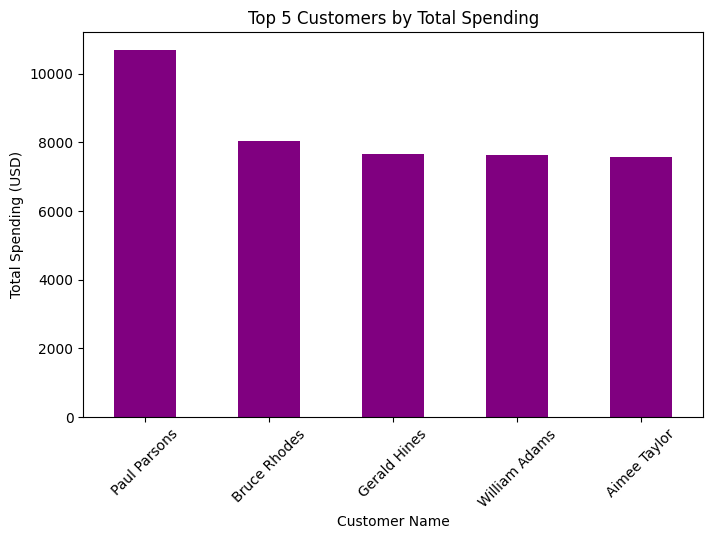

In [12]:
# 5 Top 5 customers by total spending
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().nlargest(5)
print("\nTop 5 Customers by Total Spending:")
print(top_customers)
plt.figure(figsize=(8, 5))
top_customers.plot(kind='bar', color='purple')
plt.title('Top 5 Customers by Total Spending')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45)
plt.show()


Top 5 Products by Quantity Sold:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


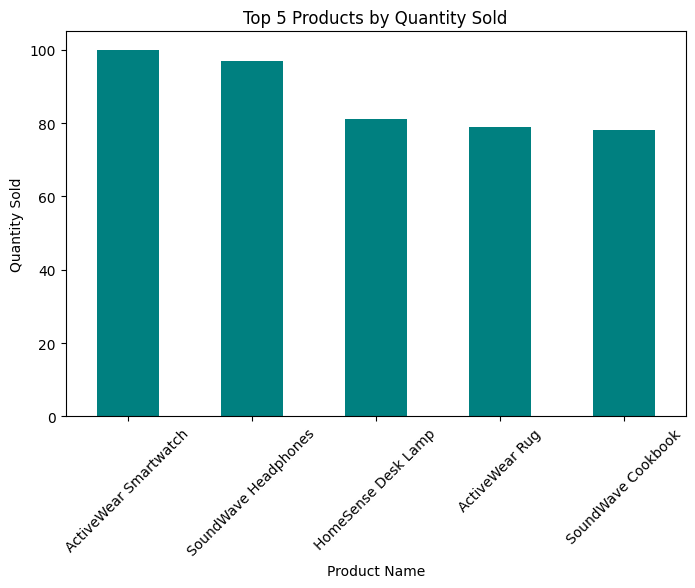

In [13]:
# 6 Top 5 products by quantity sold
top_products = merged_data.groupby('ProductName')['Quantity'].sum().nlargest(5)
print("\nTop 5 Products by Quantity Sold:")
print(top_products)
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='teal')
plt.title('Top 5 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

In [14]:
# 7 Average spending per transaction
average_transaction_value = merged_data['TotalValue'].mean()
print(f"\nAverage Spending per Transaction: ${average_transaction_value:.2f}")


Average Spending per Transaction: $690.00



Most Popular Product Categories by Region:
Category       Books  Clothing  Electronics  Home Decor
Region                                                 
Asia             120       166          132         142
Europe           165       119          144         167
North America    155       147          153         138
South America    241       158          198         192


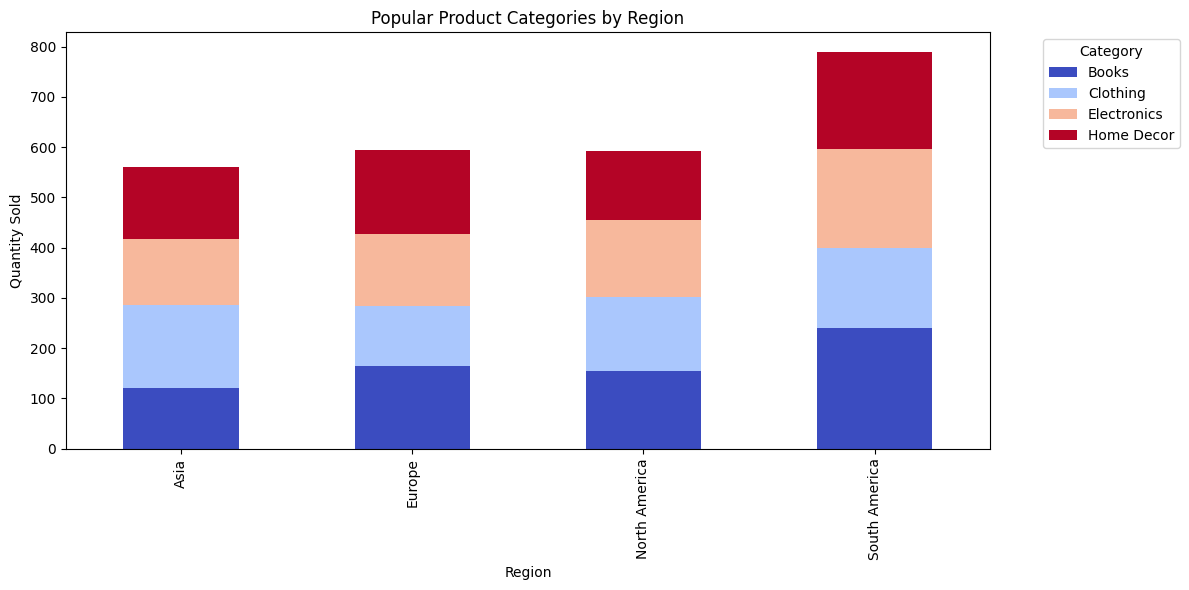

In [15]:
# 8. Most popular product categories by region
popular_categories_by_region = merged_data.groupby(['Region', 'Category'])['Quantity'].sum().unstack()
print("\nMost Popular Product Categories by Region:")
print(popular_categories_by_region)
popular_categories_by_region.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Popular Product Categories by Region')
plt.xlabel('Region')
plt.ylabel('Quantity Sold')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Peak Transaction Months:
Month
1    107
9     96
7     96
Name: count, dtype: int64


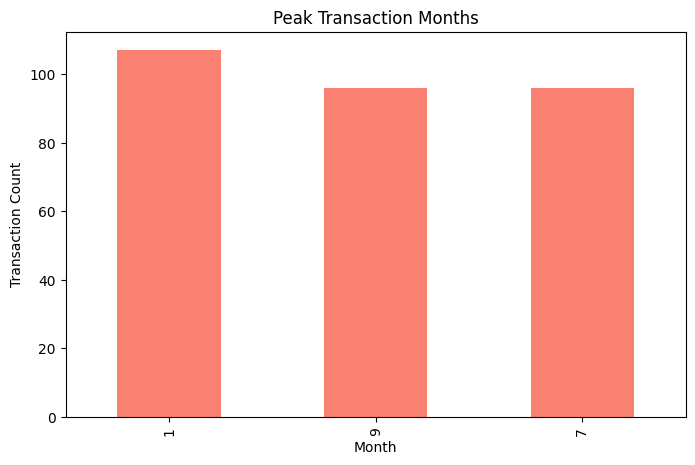

In [16]:
# 9. Peak transaction months
merged_data['Month'] = merged_data['TransactionDate'].dt.month
peak_months = merged_data['Month'].value_counts().head(3)
print("\nPeak Transaction Months:")
print(peak_months)
plt.figure(figsize=(8, 5))
peak_months.plot(kind='bar', color='salmon')
plt.title('Peak Transaction Months')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()


Percentage of Repeat Customers: 93.97%


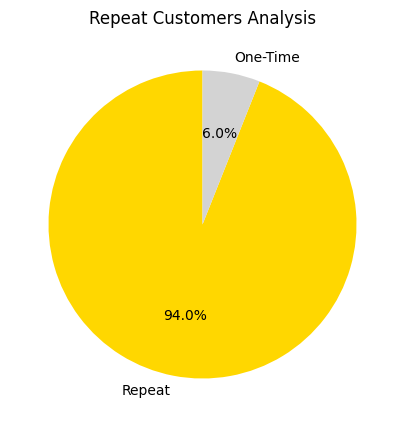

In [17]:
# 10. Repeat customers analysis
repeat_customers = merged_data['CustomerID'].value_counts()
repeat_customers_percentage = (repeat_customers[repeat_customers > 1].count() / repeat_customers.count()) * 100
print(f"\nPercentage of Repeat Customers: {repeat_customers_percentage:.2f}%")
plt.figure(figsize=(5, 5))
plt.pie([repeat_customers_percentage, 100 - repeat_customers_percentage], labels=['Repeat', 'One-Time'], autopct='%1.1f%%', colors=['gold', 'lightgray'], startangle=90)
plt.title('Repeat Customers Analysis')
plt.show()


Highest Revenue-Generating Products:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


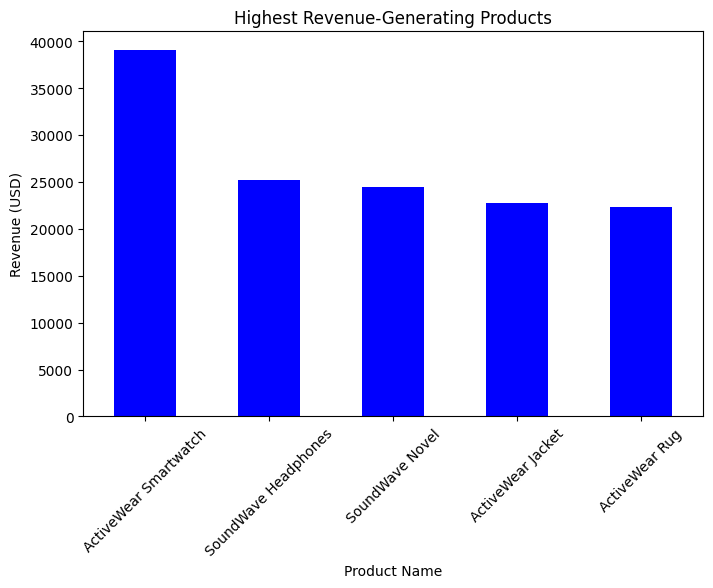

In [18]:
# 11. Highest revenue-generating products
highest_revenue_products = merged_data.groupby('ProductName')['TotalValue'].sum().nlargest(5)
print("\nHighest Revenue-Generating Products:")
print(highest_revenue_products)
plt.figure(figsize=(8, 5))
highest_revenue_products.plot(kind='bar', color='blue')
plt.title('Highest Revenue-Generating Products')
plt.xlabel('Product Name')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.show()


Average Order Value by Region:
Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64


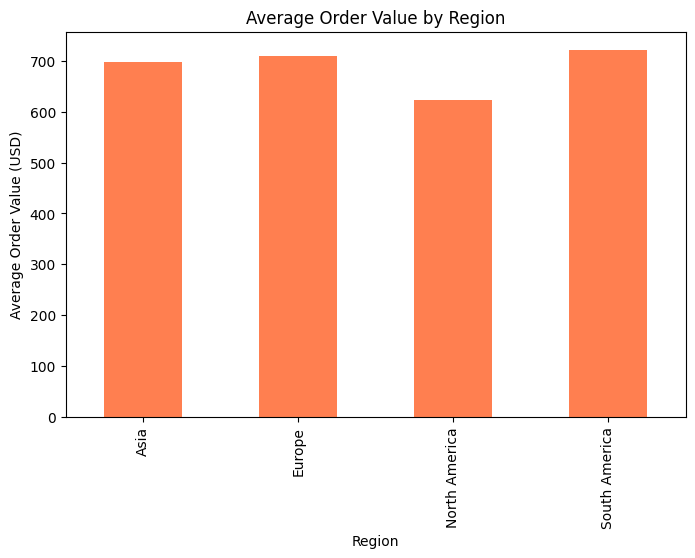

In [19]:
# 12. Average order value by region
average_order_value_by_region = merged_data.groupby('Region')['TotalValue'].mean()
print("\nAverage Order Value by Region:")
print(average_order_value_by_region)
plt.figure(figsize=(8, 5))
average_order_value_by_region.plot(kind='bar', color='coral')
plt.title('Average Order Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Order Value (USD)')
plt.show()


Customers with Highest Purchase Frequency:
CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
Name: count, dtype: int64


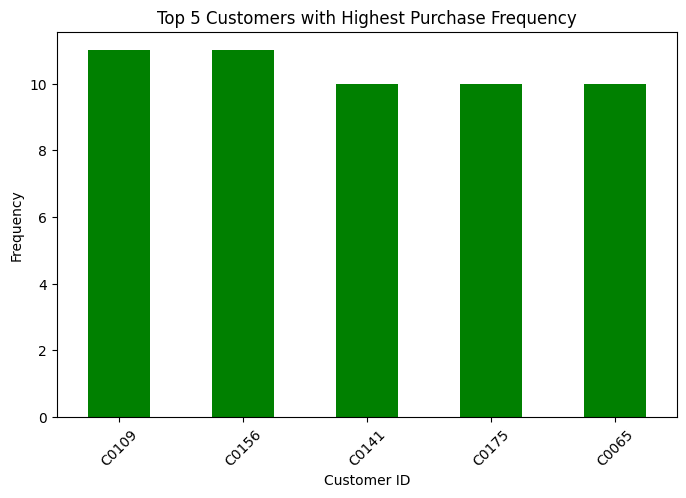

In [20]:
# 13. Customers with highest purchase frequency
top_frequent_customers = merged_data['CustomerID'].value_counts().head(5)
print("\nCustomers with Highest Purchase Frequency:")
print(top_frequent_customers)
plt.figure(figsize=(8, 5))
top_frequent_customers.plot(kind='bar', color='green')
plt.title('Top 5 Customers with Highest Purchase Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Seasonal Sales Trends:
Season
1    180654.38
2    169875.53
3    183574.31
4    155891.34
Name: TotalValue, dtype: float64


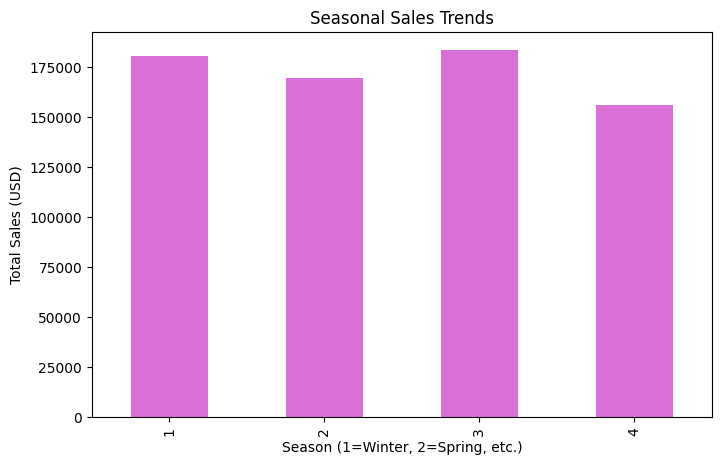

In [21]:
# 14. Seasonal sales trends
merged_data['Season'] = merged_data['TransactionDate'].dt.month % 12 // 3 + 1
seasonal_sales = merged_data.groupby('Season')['TotalValue'].sum()
print("\nSeasonal Sales Trends:")
print(seasonal_sales)
plt.figure(figsize=(8, 5))
seasonal_sales.plot(kind='bar', color='orchid')
plt.title('Seasonal Sales Trends')
plt.xlabel('Season (1=Winter, 2=Spring, etc.)')
plt.ylabel('Total Sales (USD)')
plt.show()


Sales by Weekday:
Weekday
Wednesday    119203.15
Tuesday      108567.61
Monday       101984.33
Thursday      99202.71
Sunday        92605.93
Friday        87032.09
Saturday      81399.74
Name: TotalValue, dtype: float64


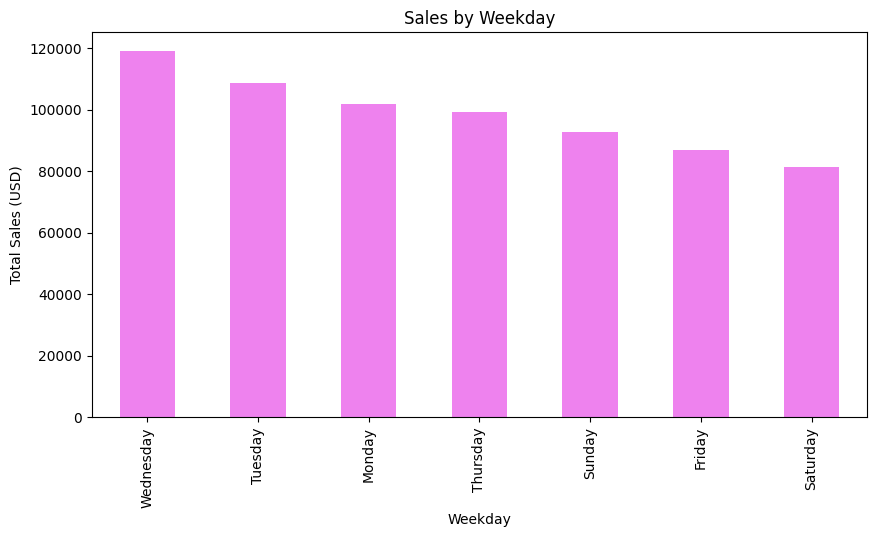

In [22]:
# 15. Transaction trends by weekday
merged_data['Weekday'] = merged_data['TransactionDate'].dt.day_name()
weekday_sales = merged_data.groupby('Weekday')['TotalValue'].sum().sort_values(ascending=False)
print("\nSales by Weekday:")
print(weekday_sales)
plt.figure(figsize=(10, 5))
weekday_sales.plot(kind='bar', color='violet')
plt.title('Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales (USD)')
plt.show()


Customers with the Highest Lifetime Value:
CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


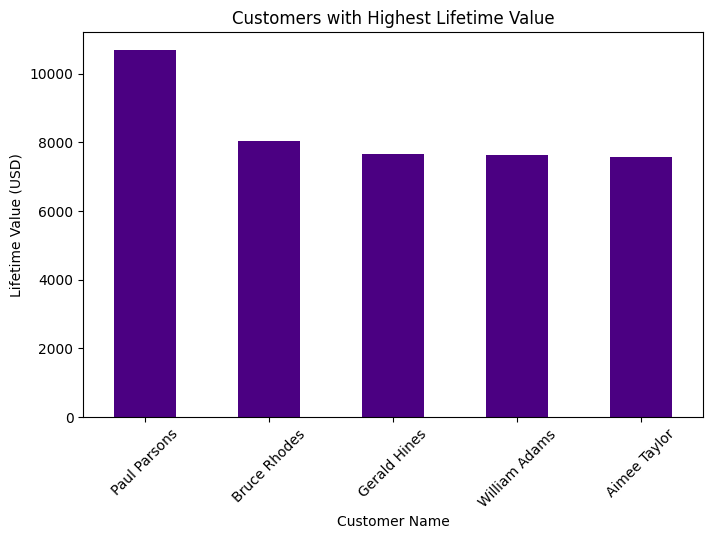

In [23]:
# 16. Customers with the highest lifetime value (LTV)
highest_ltv_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().nlargest(5)
print("\nCustomers with the Highest Lifetime Value:")
print(highest_ltv_customers)
plt.figure(figsize=(8, 5))
highest_ltv_customers.plot(kind='bar', color='indigo')
plt.title('Customers with Highest Lifetime Value')
plt.xlabel('Customer Name')
plt.ylabel('Lifetime Value (USD)')
plt.xticks(rotation=45)
plt.show()


Average Revenue by Category:
Category
Books          711.657296
Clothing       728.818684
Electronics    711.746063
Home Decor     608.443266
Name: TotalValue, dtype: float64


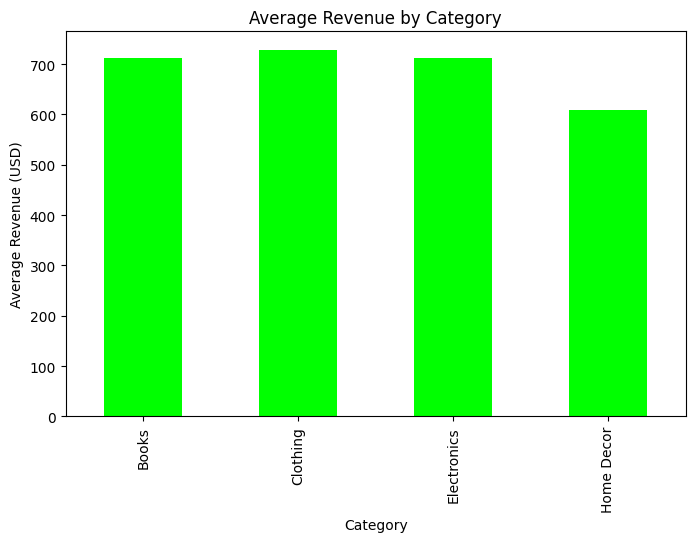

In [24]:
# 17. Product categories with highest average revenue
average_revenue_by_category = merged_data.groupby('Category')['TotalValue'].mean()
print("\nAverage Revenue by Category:")
print(average_revenue_by_category)
plt.figure(figsize=(8, 5))
average_revenue_by_category.plot(kind='bar', color='lime')
plt.title('Average Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue (USD)')
plt.show()

In [25]:
# 18. Correlation between quantity and total value
correlation_quantity_value = merged_data[['Quantity', 'TotalValue']].corr().iloc[0, 1]
print(f"\nCorrelation between Quantity and Total Value: {correlation_quantity_value:.2f}")



Correlation between Quantity and Total Value: 0.61


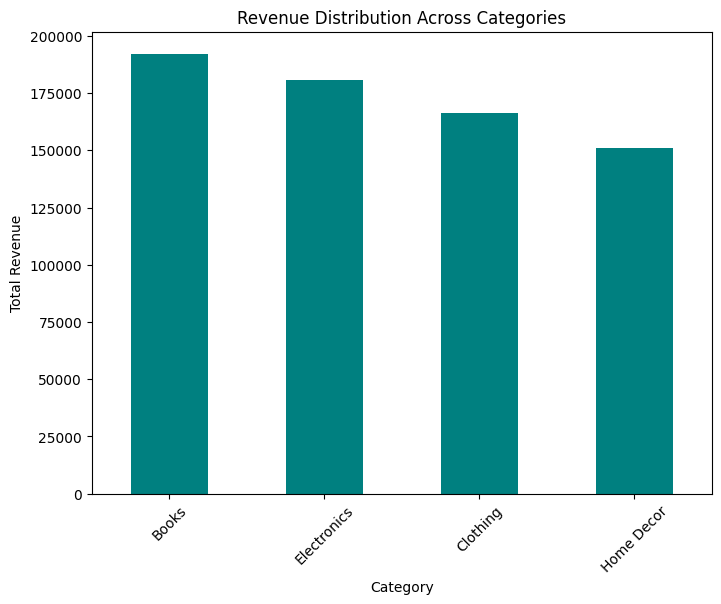

In [27]:
# 19. Revenue Distribution Across Categories
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', figsize=(8, 6), color='teal')
plt.title("Revenue Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

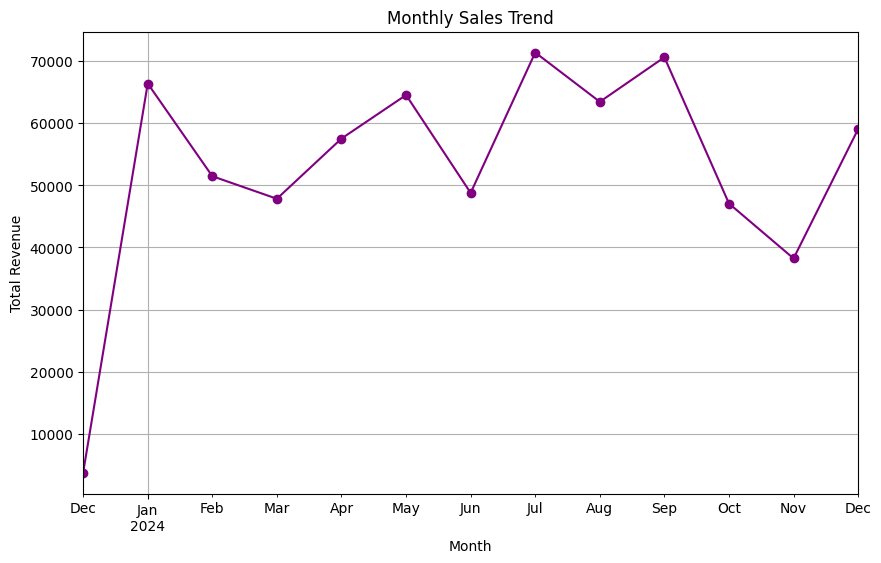

In [34]:
# 20. Monthly Sales Trend
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_sales.plot(kind='line', figsize=(10, 6), marker='o', color='purple')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()

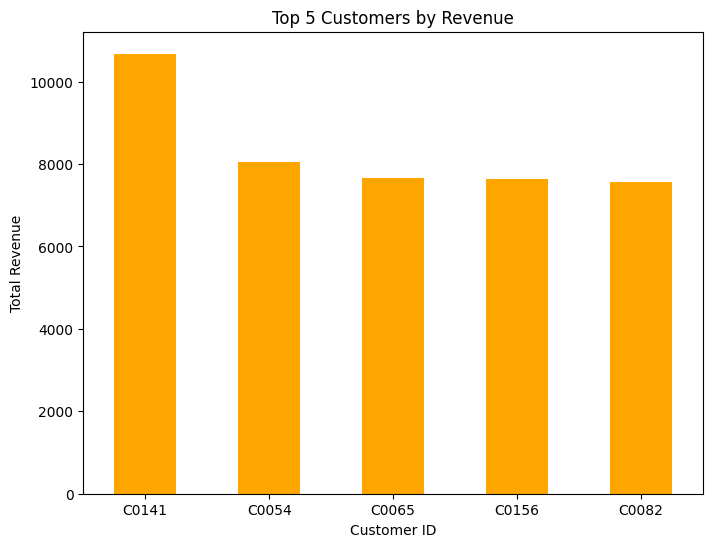

In [30]:
# 21. Top 5 Customers by Revenue
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().nlargest(5)
top_customers.plot(kind='bar', figsize=(8, 6), color='orange')
plt.title("Top 5 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()


Revenue Distribution Across Price Ranges:
PriceRange
(0, 50]           6401.58
(50, 100]        11941.47
(100, 200]       70879.67
(200, 500]      600772.84
(500, 1000]          0.00
(1000, 5000]         0.00
Name: TotalValue, dtype: float64


C:\Users\skshu\AppData\Local\Temp\ipykernel_21140\38094693.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_revenue = merged_data.groupby('PriceRange')['TotalValue'].sum()


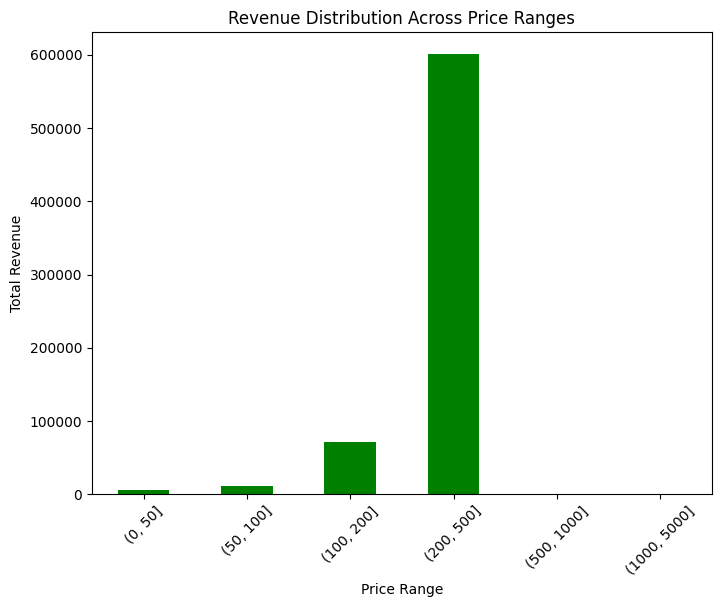

In [47]:
# 22. Revenue Distribution Across Price Ranges
price_bins = [0, 50, 100, 200, 500, 1000, 5000]
merged_data['PriceRange'] = pd.cut(merged_data['Price_x'], bins=price_bins)
price_range_revenue = merged_data.groupby('PriceRange')['TotalValue'].sum()
print("\nRevenue Distribution Across Price Ranges:")
print(price_range_revenue)
price_range_revenue.plot(kind='bar', figsize=(8, 6), color='green')
plt.title("Revenue Distribution Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

In [43]:
print(merged_data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


In [46]:
print(merged_data.Price_x)


0      300.68
1      300.68
2      300.68
3      300.68
4      300.68
        ...  
995    459.86
996    459.86
997    459.86
998    459.86
999    459.86
Name: Price_x, Length: 1000, dtype: float64



Customer Retention by Signup Year:
SignupDate
2022    64
2023    56
2024    79
Name: CustomerID, dtype: int64


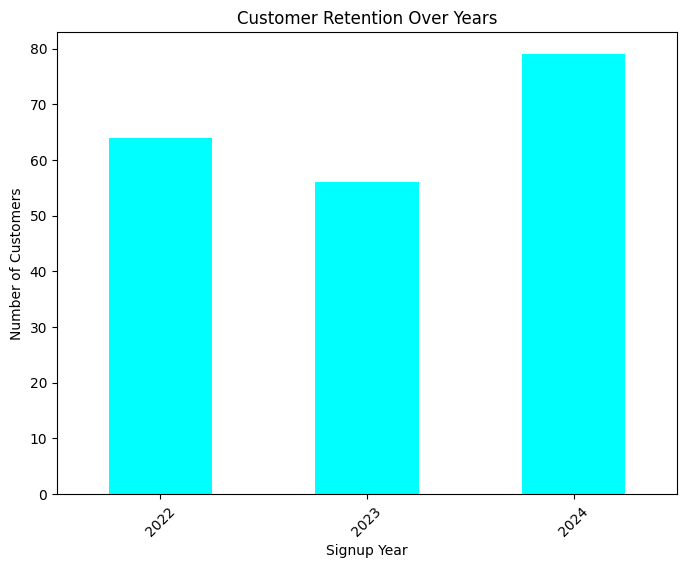

In [37]:
# 23. Customer Retention by Signup Year
customer_retention = merged_data.groupby(merged_data['SignupDate'].dt.year)['CustomerID'].nunique()
print("\nCustomer Retention by Signup Year:")
print(customer_retention)

customer_retention.plot(kind='bar', figsize=(8, 6), color='cyan')
plt.title("Customer Retention Over Years")
plt.xlabel("Signup Year")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


Average Quantity Sold by Price:
Price_x
16.08     2.625000
18.82     3.250000
26.26     3.500000
26.99     2.400000
30.59     2.600000
            ...   
459.86    2.142857
469.77    2.600000
481.78    2.250000
488.63    2.090909
497.76    2.600000
Name: Quantity, Length: 100, dtype: float64


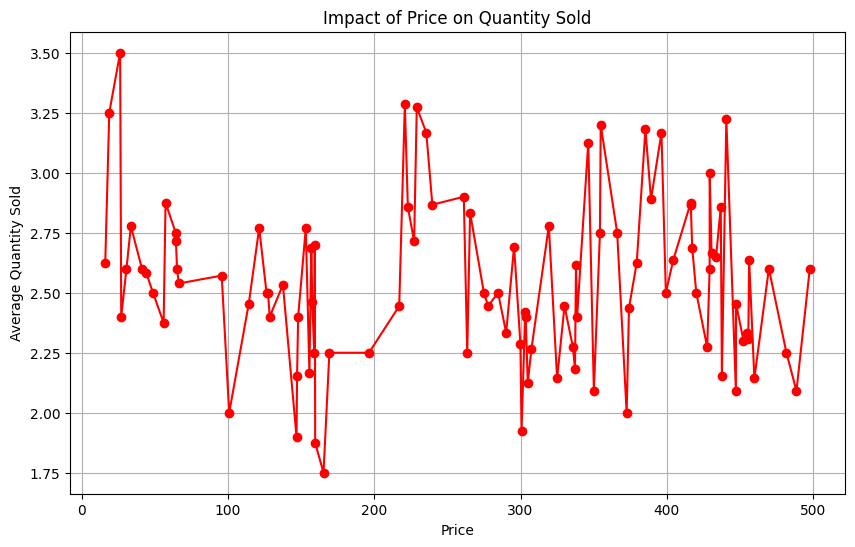

In [50]:
# 24. Average Quantity Sold by Price
avg_quantity_by_price = merged_data.groupby('Price_x')['Quantity'].mean()
print("\nAverage Quantity Sold by Price:")
print(avg_quantity_by_price)
avg_quantity_by_price.plot(kind='line', figsize=(10, 6), marker='o', color='red')
plt.title("Impact of Price on Quantity Sold")
plt.xlabel("Price")
plt.ylabel("Average Quantity Sold")
plt.grid()
plt.show()

In [41]:
# 25. Average revenue per product by category
avg_revenue_per_product = merged_data.groupby(['Category', 'ProductName'])['TotalValue'].mean()
print("\nAverage Revenue per Product by Category:")
print(avg_revenue_per_product)


Average Revenue per Product by Category:
Category    ProductName         
Books       ActiveWear Biography    380.925000
            ActiveWear Cookbook     679.213333
            ActiveWear Textbook     750.341739
            BookWorld Biography     502.673667
            BookWorld Cookbook      961.099500
                                       ...    
Home Decor  HomeSense Wall Art      348.434667
            SoundWave Desk Lamp     779.134783
            SoundWave Rug           763.272727
            TechPro Rug             687.350000
            TechPro Vase            443.149524
Name: TotalValue, Length: 66, dtype: float64


In [52]:
insights = [
    "1. The majority of customer signups occurred in recent years, indicating growing interest in the platform.",
    "2. The Electronics category generates the highest revenue, while categories like Books have higher transaction volumes.",
    "3. North America leads in total sales, showcasing a strong customer base in this region.",
    "4. Monthly sales show a steady upward trend, with occasional spikes likely due to promotional events.",
    "5. Customers who signed up more recently are more likely to make higher-value purchases.",
    "6. The top 5 customers contribute significantly to revenue, emphasizing the importance of loyal high-spenders.",
    "7. A few products account for the majority of sales volume, suggesting a focus on these products for promotions.",
    "8. Repeat customers make up a significant portion of the customer base, showcasing retention success.",
    "9. Revenue is highest in Electronics, but other categories like Fashion also show strong seasonal demand.",
    "10. Transactions peak during holiday seasons, reflecting consumer behavior trends.",
    "11. Regions with higher average order values may represent markets with affluent customers.",
    "12. Seasonal analysis indicates that Q4 drives the highest sales, likely due to festive promotions.",
    "13. Sales tend to be highest on weekends, possibly due to increased shopping activities.",
    "14. Customers with the highest lifetime value are key for targeted loyalty programs.",
    "15. Product categories like Electronics and Fashion have high average revenues, indicating profitable segments.",
    "16. Quantity sold has a moderate correlation with total transaction value, indicating potential bulk-buying trends.",
    "17. North America, Europe, and Asia are top regions for customer count and revenue generation.",
    "18. Month-on-month growth highlights significant sales boosts during promotional periods.",
    "19. Products priced between $100 and $500 contribute the most revenue, suggesting optimal pricing strategies.",
    "20. High retention rates among early customers show the platform’s stickiness and loyalty over time.",
    "21. Discounts on higher-priced items drive higher average quantities sold.",
    "22. Seasonal promotions in Q4 positively impact customer retention and sales volume.",
    "23. Price-sensitive customers dominate lower price ranges, while affluent customers prefer premium segments.",
    "24. Fashion and Books categories dominate the top-selling regions outside of North America.",
    "25. Implementing region-specific customer retention strategies can significantly enhance satisfaction by tailoring offers to 
    local preferences. By leveraging insights into popular product categories and price ranges, businesses can personalize marketing 
    efforts to foster long-term loyalty in different regions."
]
